In [ ]:
%pip install -r requirements.txt

In [ ]:
!python -m visdom.server

In [ ]:
!start http://localhost:8097/

In [ ]:
!python train.py --dataroot ./datasets/gif_2/ --name gif_2 --no_flip --norm batch --model vec2pic --dataset_mode vec2pic --load_size 160 --crop_size 160 --sig 0.1 --netD_pic n_layers --n_layers_D 3 --display_freq 5 --n_epochs 200 --lr 1e-5 --netG ffnet_n_layers --n_layers_G 15

----------------- Options ---------------
               batch_size: 32                            
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 160                           	[default: 64]
                 dataroot: ./datasets/gif_2/             	[default: None]
             dataset_mode: vec2pic                       	[default: vec]
                direction: AtoB                          
              display_env: main                          
             display_freq: 5                             	[default: 0]
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: lat

In [61]:
!python create_test_dataset.py --dataroot ./datasets/gif_2_test/ --name gif_2 --no_flip --norm batch --norm batch --model vec2pic --dataset_mode vec2pictest --load_size 160 --crop_size 160 --batch_size 17 --no_flip --gpu_ids -1

----------------- Options ---------------
               batch_size: 17                            	[default: 32]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 160                           	[default: 64]
                 dataroot: ./datasets/gif_2_test/        	[default: None]
             dataset_mode: vec2pictest                   	[default: vec]
                direction: AtoB                          
              display_env: main                          
             display_freq: 0                             
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: la

In [48]:
!python create_test.py --dataroot ./datasets/gif_2/ --name gif_2 --no_flip --norm batch --norm batch --model vec2pic --dataset_mode vec2pic --load_size 160 --crop_size 160 --netG ffnet_n_layers --n_layers_G 15 --batch_size 340 --no_flip --gpu_ids -1

----------------- Options ---------------
               batch_size: 340                           	[default: 32]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 160                           	[default: 64]
                 dataroot: ./datasets/gif_2/             	[default: None]
             dataset_mode: vec2pic                       	[default: vec]
                direction: AtoB                          
              display_env: main                          
             display_freq: 0                             
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: la

In [62]:
import os
import torch
# define a function to load the model and dataset from dir
def load_model_and_dataset(dir):
    G_A = torch.load(os.path.join(dir, 'netG_A.pth'))
    G_B = torch.load(os.path.join(dir, 'netG_B.pth'))
    dataset = torch.load(os.path.join(dir, 'dataset.pth'))
    testset = torch.load(os.path.join(dir, 'testset.pth'))
    return G_A, G_B, dataset, testset

In [63]:
G_A, G_B, dataset, testset = load_model_and_dataset('./results/gif_2/')

(340, 160, 160)
(17, 160, 160)


In [70]:
import re
import numpy as np
import matplotlib.pyplot as plt

def get_numbers_after_backslash(input_string):
    numbers = re.findall(r'\\(\d+)', input_string)
    return numbers

In [86]:

for batch in testset:
        pass
test_images_tensor = batch['B']
test_images_names = batch['B_paths']
test_images_index = [get_numbers_after_backslash(name)[0] for name in test_images_names]
test_images_index = [int(i) for i in test_images_index]
print(test_images_index)
order = np.argsort(test_images_index)
n_test = test_images_tensor.size(0)
test_images = test_images_tensor.reshape(n_test, 160, 160).detach().numpy()
print(test_images.shape)

['1', '0', '13', '15', '11', '8', '2', '6', '10', '9', '16', '14', '12', '3', '5', '4', '7']
[1, 0, 13, 15, 11, 8, 2, 6, 10, 9, 16, 14, 12, 3, 5, 4, 7]
(17, 160, 160)


In [91]:
for batch in dataset:
        pass

images_tensor = batch['B']
images_names = batch['B_paths']
images_index = [get_numbers_after_backslash(name)[0] for name in images_names]
images_index = [int(i) for i in images_index]
print(images_index)
order = np.argsort(images_index)
images_tensor = images_tensor[order]
#select every 20 images
unique_indx = [i*20 for i in range(17)]
images_tensor = images_tensor[unique_indx]

n = images_tensor.size(0)
images = images_tensor.reshape(n, 160, 160).detach().numpy()
print(images.shape)


[115, 116, 117, 203, 259, 316, 126, 82, 255, 223, 336, 144, 279, 253, 216, 223, 154, 129, 320, 49, 47, 286, 230, 258, 286, 128, 138, 339, 156, 160, 52, 158, 215, 187, 116, 48, 142, 49, 134, 175, 223, 161, 30, 18, 99, 39, 84, 8, 324, 229, 65, 286, 138, 114, 186, 319, 237, 313, 166, 238, 236, 50, 98, 232, 333, 103, 131, 136, 103, 64, 242, 279, 64, 107, 177, 238, 298, 56, 168, 124, 273, 181, 311, 42, 250, 202, 20, 211, 27, 228, 232, 99, 262, 310, 105, 26, 71, 222, 213, 223, 137, 169, 79, 128, 6, 234, 137, 282, 210, 286, 129, 206, 58, 315, 42, 76, 60, 157, 233, 21, 266, 267, 286, 191, 255, 38, 77, 237, 84, 281, 190, 333, 176, 151, 198, 127, 221, 26, 326, 133, 103, 60, 148, 217, 303, 294, 201, 320, 10, 35, 261, 80, 257, 72, 16, 20, 185, 243, 75, 85, 9, 55, 298, 279, 116, 63, 68, 228, 282, 337, 312, 91, 82, 91, 30, 233, 333, 270, 108, 87, 20, 99, 327, 172, 199, 148, 82, 284, 118, 322, 47, 9, 254, 106, 43, 185, 135, 164, 157, 219, 282, 300, 250, 305, 136, 63, 142, 145, 317, 147, 252, 51, 242,

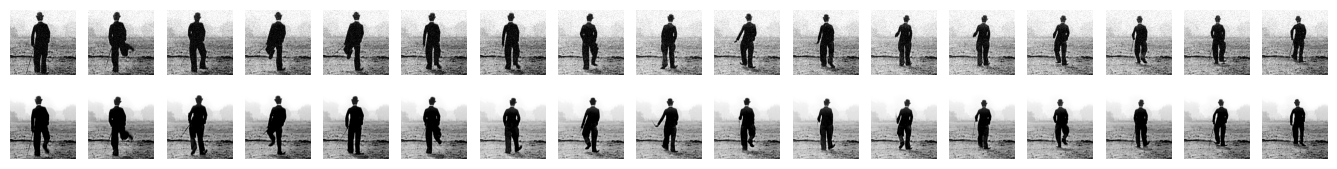

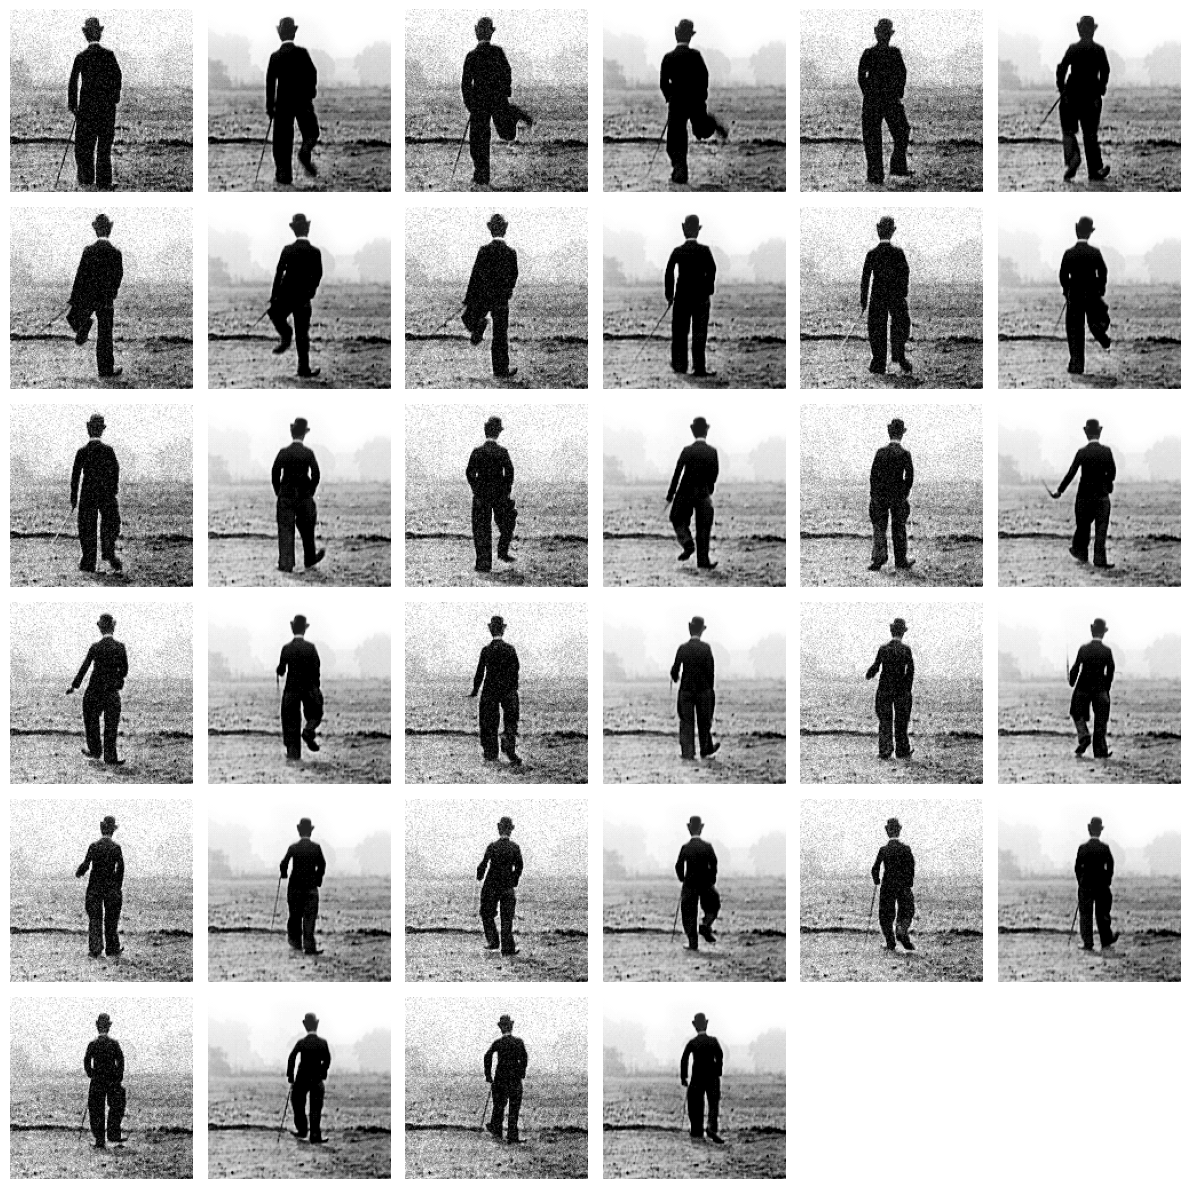

In [123]:

# plot the images
fig, axes = plt.subplots(nrows=2, ncols=17, figsize=(17, 2))
for i in range(17):
        axes[0, i].imshow(images[i], cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(test_images[i], cmap='gray')
        axes[1, i].axis('off')
plt.show()

import matplotlib.pyplot as plt


fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.flatten()
for i in range(34):
    ax = axes[i]
    if i%2 == 0:
        ax.imshow(images[int(i/2)], cmap='gray')
    else:
        ax.imshow(test_images[int(i/2)], cmap='gray')
    ax.axis('off')
if len(axes) > 34:
    for j in range(34, len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()



The code of the first image is:  tensor([0.3341], grad_fn=<ViewBackward0>)
The code of the second image is:  tensor([0.2062], grad_fn=<ViewBackward0>)


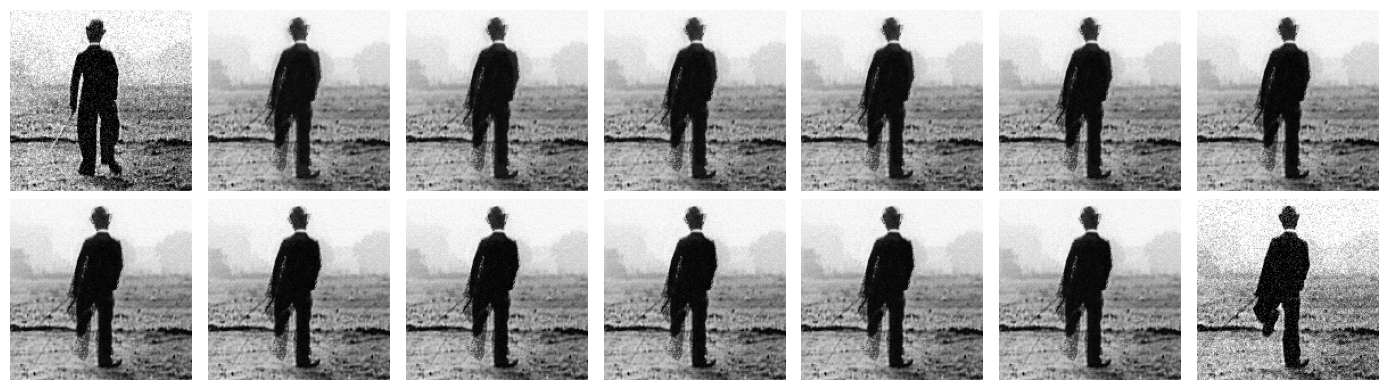

In [119]:
ind0 = 4
ind1 = 5

code0 = G_B(images_tensor[ind0]).view(1)
code1 = G_B(images_tensor[ind1]).view(1)
print('The code of the first image is: ', code0)
print('The code of the second image is: ', code1)

if code0 > code1:
    code0, code1 = code1, code0
    ind0, ind1 = ind1, ind0

n_inter = 12

inteps = torch.linspace(0.3, code1.item(), n_inter).view(n_inter,1)
intep_images = G_A(inteps)
intep_images = intep_images.reshape(n_inter, 160, 160).detach().numpy()

fig, axs = plt.subplots((n_inter+2)//7, 7, figsize=(14,(n_inter+2)//7*2))
axs = axs.flatten()
axs[0].imshow(images[ind0], cmap='gray')
axs[0].axis('off')
axs[n_inter+1].imshow(images[ind1], cmap='gray')
axs[n_inter+1].axis('off')
# Iterate over the images and plot them
for i, ax in enumerate(axs[1:n_inter+1]):
    # Plot each image in grayscale
    ax.imshow(intep_images[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()
